In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
#python kodu buraya
titanic.groupby(['Sex'])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [4]:
mean_encoded = titanic.groupby(['Sex'])['Survived'].mean().to_dict() 
titanic['Sex'] =  titanic['Sex'].map(mean_encoded)   
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [5]:
display(titanic.Embarked.head(10))

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [6]:
titanic.Embarked.mode()

0    S
dtype: object

In [7]:
#python kodu buraya
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)
encoded_feat = enc.fit_transform(titanic[["Embarked"]]).astype(np.uint8)
encoded_feat

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [8]:
embarked_enc = pd.DataFrame(encoded_feat, index = titanic.index, columns = ["C","Q","S"])
display(embarked_enc.head(10))

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [9]:
titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [10]:
#python kodu buraya
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

titanic["Cabin"] = titanic["Cabin"].astype(str)
titanic["Label_Encoder_Cabin"] = label_encoder.fit_transform(titanic.Cabin)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label_Encoder_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,nan,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,nan,S,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.188908,27.0,0,0,211536,13.0000,nan,S,147
887,888,1,1,"Graham, Miss. Margaret Edith",0.742038,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.742038,NaN,1,2,W./C. 6607,23.4500,nan,S,147
889,890,1,1,"Behr, Mr. Karl Howell",0.188908,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

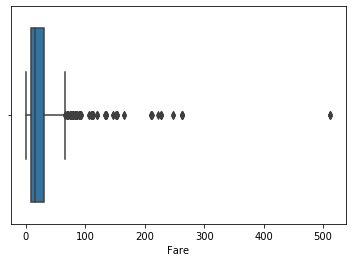

In [11]:
#python kodu buraya
sns.boxplot(titanic.Fare);

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [12]:
#python kodu buraya
z_score = (titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()
z_score

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [13]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

In [14]:
upper = titanic[z_score<=3]["Fare"].max()
lower = titanic[z_score>=-3]["Fare"].min()
upper,lower

(164.8667, 0.0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [15]:
#python kodu buraya
titanic_zscore_replaced = titanic.copy()
titanic_zscore_replaced["Fare"][z_score>3] = upper
titanic_zscore_replaced["Fare"][z_score<-3] = lower
titanic_zscore_replaced.head(30)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label_Encoder_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,nan,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,nan,S,147
5,6,0,3,"Moran, Mr. James",0.188908,NaN,0,0,330877,8.4583,nan,Q,147
6,7,0,1,"McCarthy, Mr. Timothy J",0.188908,54.0,0,0,17463,51.8625,E46,S,129
7,8,0,3,"Palsson, Master. Gosta Leonard",0.188908,2.0,3,1,349909,21.0750,nan,S,147
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.742038,27.0,0,2,347742,11.1333,nan,S,147
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.742038,14.0,1,0,237736,30.0708,nan,C,147


Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [16]:
#python kodu buraya
q1 = titanic["Fare"].quantile(q=0.25)
q3 = titanic["Fare"].quantile(q=0.75)

In [17]:
iqr = q3-q1
iqr

23.0896

In [18]:
from scipy import stats 
iqr = stats.iqr(titanic["Fare"]) 
iqr 
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit

(-26.724, 65.6344)

In [19]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [20]:
#python kodu buraya
titanic_iqr_replaced = titanic.copy()
titanic_iqr_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_iqr_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit
titanic_iqr_replaced.head(20)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label_Encoder_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,nan,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,65.6344,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,nan,S,147
5,6,0,3,"Moran, Mr. James",0.188908,NaN,0,0,330877,8.4583,nan,Q,147
6,7,0,1,"McCarthy, Mr. Timothy J",0.188908,54.0,0,0,17463,51.8625,E46,S,129
7,8,0,3,"Palsson, Master. Gosta Leonard",0.188908,2.0,3,1,349909,21.0750,nan,S,147
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.742038,27.0,0,2,347742,11.1333,nan,S,147
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.742038,14.0,1,0,237736,30.0708,nan,C,147


Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [21]:
#python kodu buraya
lower_limit = titanic["Fare"].quantile(q=0.01)
upper_limit = titanic["Fare"].quantile(q=0.99)
lower_limit, upper_limit

(0.0, 249.00622000000033)

In [22]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

9

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [23]:
#python kodu buraya
titanic_hardedges_replaced = titanic.copy()
titanic_hardedges_replaced["Fare"][z_score>3] = upper_limit
titanic_hardedges_replaced["Fare"][z_score<-3] = lower_limit
titanic_hardedges_replaced.head(30)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label_Encoder_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.25000,nan,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.28330,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.92500,nan,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.10000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.05000,nan,S,147
5,6,0,3,"Moran, Mr. James",0.188908,NaN,0,0,330877,8.45830,nan,Q,147
6,7,0,1,"McCarthy, Mr. Timothy J",0.188908,54.0,0,0,17463,51.86250,E46,S,129
7,8,0,3,"Palsson, Master. Gosta Leonard",0.188908,2.0,3,1,349909,21.07500,nan,S,147
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.742038,27.0,0,2,347742,11.13330,nan,S,147
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.742038,14.0,1,0,237736,30.07080,nan,C,147


Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

* Z-score metodunda 20 outliers, IQR metodunda 116 outliers, Hard-Edges metodunda 9 outliers çıkmıştır. Hard-Edges kullanmak daha mantıklı olur.